# Newyork AirBnB Data Analysis

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

Reading the data

In [2]:
airbnb = pd.read_csv('C:\\Users\\Sowmya Surampalli\\Downloads\\AB_NYC_2019.csv')

### Basic feel of data

In [3]:
airbnb.shape

(48895, 16)

There are 48895 rows and 16 columns in the data

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can see clear outliers in minimum nights and number_of_reviews. Let us review them

### Outliers

#### Outliers of minimum_nights

In [ ]:
sns.boxplot(airbnb.minimum_nights)

In [7]:
airbnb.minimum_nights.quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

0.90    28.0
0.91    30.0
0.92    30.0
0.93    30.0
0.94    30.0
0.95    30.0
0.96    30.0
0.97    30.0
0.98    30.0
0.99    45.0
Name: minimum_nights, dtype: float64

Yes, our guess is correct. There are outliers. Clearly anything above 99th percentile is an outlier. So let us drop all the values above 45.

In [10]:
airbnb = airbnb[airbnb['minimum_nights']<=45]
airbnb.shape

(48426, 16)

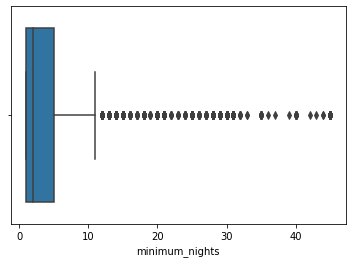

In [11]:
sns.boxplot(airbnb.minimum_nights)

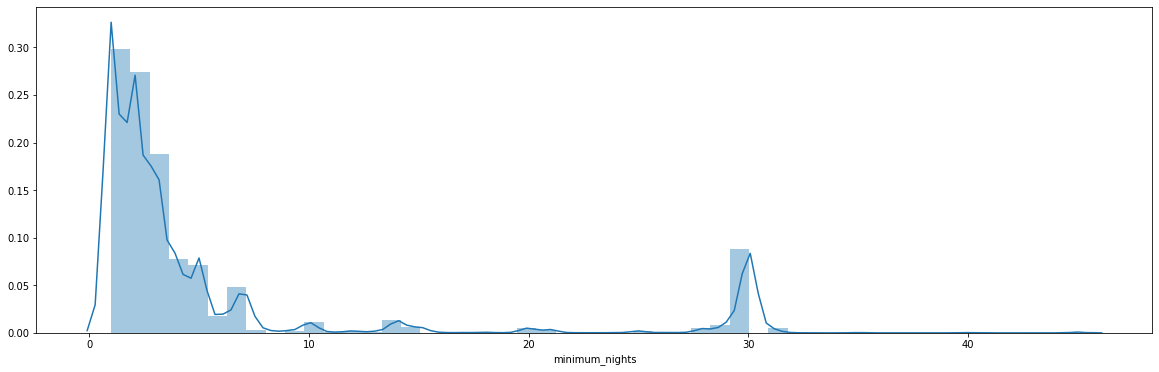

In [15]:
plt.figure(figsize=(20,6))
sns.distplot(airbnb.minimum_nights)

- Many properties are having 1 day as a mimimum limit on the days of stay.
- Most of the properties are having the minimum limit to be less than a week.
- Good number of properties are having the minimum limit as 30 days

#### Outliers of number_of_reviews

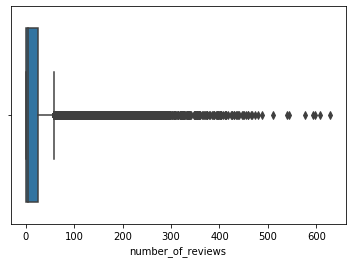

In [17]:
sns.boxplot(airbnb.number_of_reviews)

In [18]:
airbnb.number_of_reviews.quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])

0.90     71.0
0.91     77.0
0.92     84.0
0.93     92.0
0.94    102.0
0.95    115.0
0.96    129.0
0.97    146.0
0.98    172.0
0.99    214.0
Name: number_of_reviews, dtype: float64

From 95th percentile, there is a clear amount of high difference in the number of reviews. So let us consider them to be outliers and check if the number of rows being dropped

In [22]:
len(airbnb[airbnb['number_of_reviews'] > 214])

478

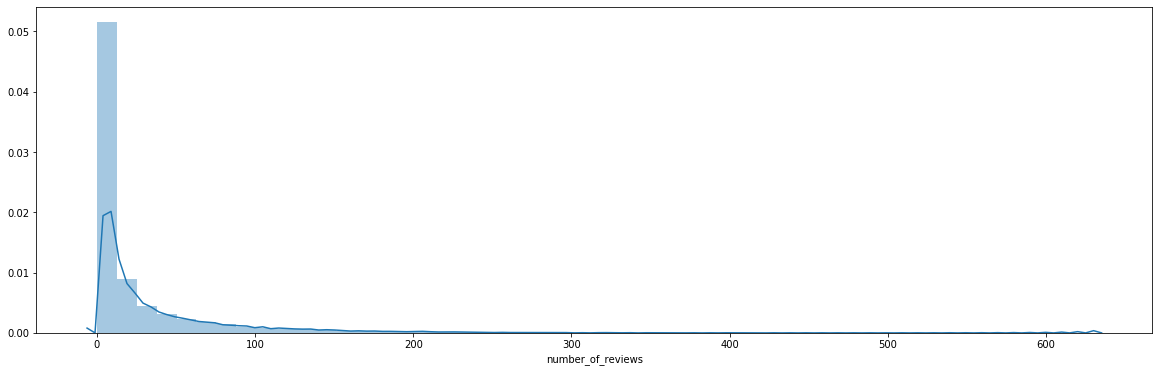

In [24]:
plt.figure(figsize=(20,6))
sns.distplot(airbnb.number_of_reviews)